In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

### Unstructured Variance, n_input = 2, n_output = 2 

In [2]:
m = n_input = 2
s = n_output = 2

In [3]:
np.random.seed(0)
x_min = np.random.uniform(1,10, m+s)
x_min

array([5.94, 7.44, 6.42, 5.9 ])

In [4]:
np.random.seed(0)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([549.26, 715.47, 603.16, 545.34])

In [5]:
x_max = x_min + delta_x
x_max

array([555.2 , 722.91, 609.59, 551.24])

In [6]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([280.57, 365.17, 308.01, 278.57])

In [7]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 91.54, 119.25, 100.53,  90.89])

In [8]:
np.random.seed(0)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [9]:
std_list

[50.240646555803664, 85.28325388479718, 60.593854536970724, 49.52427810211898]

In [10]:
cov_matrix_int = []

for i in range(m + s):
    for j in range(m + s):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [11]:
cov_matrix_int

[(0, 1, -4284.685815554964, 4284.685815554964),
 (0, 2, -3044.2744292457264, 3044.2744292457264),
 (0, 3, -2488.131752059887, 2488.131752059887),
 (1, 2, -5167.641080334944, 5167.641080334944),
 (1, 3, -4223.591582844314, 4223.591582844314),
 (2, 3, -3000.866903368282, 3000.866903368282)]

In [12]:
cov_list = []
np.random.seed(1)

for i in cov_matrix_int:
    n = np.random.uniform(i[2],i[3])
    cov_list.append(n)
cov_list

[-711.0692789081354,
 1341.456443044959,
 -2487.562592830543,
 -2042.9486358236572,
 -2983.9176924683584,
 -2446.67523747784]

In [13]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

4


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[ 2524.12  -711.07  1341.46 -2487.56]
 [ -711.07  7273.23 -2042.95 -2983.92]
 [ 1341.46 -2042.95  3671.62 -2446.68]
 [-2487.56 -2983.92 -2446.68  2452.65]]


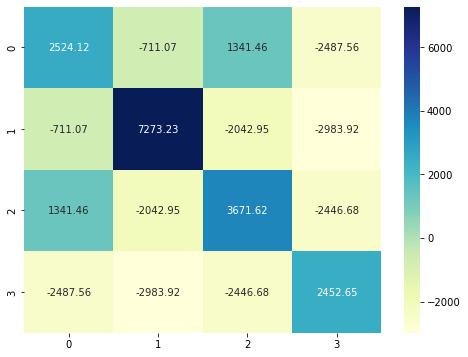

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [16]:
US_22 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
US_22.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
US_22.index = ["DMU " + str(i + 1) for i in range(len(US_22))]
US_22 = US_22.round(2)
US_22

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_34887/2917725350.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  US_22 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))


,Input 1,Input 2,Output 1,Output 2
DMU 1,151.42,324.96,303.04,321.64
DMU 2,234.02,516.63,235.08,248.36
DMU 3,184.48,510.16,183.22,338.86
DMU 4,208.45,476.52,251.44,299.36
DMU 5,357.47,375.87,327.81,282.08
...,...,...,...,...
DMU 996,324.76,312.23,326.97,304.73
DMU 997,296.16,284.97,317.38,301.61
DMU 998,341.29,192.10,343.57,309.25
DMU 999,264.95,316.08,352.08,339.50


In [17]:
(US_22<=0).sum()

Input 1     0
Input 2     0
Output 1    0
Output 2    0
dtype: int64

In [18]:
US_22.to_excel("Data/US22.xlsx")

### Structured Variance, n_input = 2, n_output = 2

In [19]:
m = n_input = 2
s = n_output = 2

In [20]:
np.random.seed(5)
x_min = np.random.uniform(1,10, m+s, )
x_min

array([3.  , 8.84, 2.86, 9.27])

In [21]:
np.random.seed(5)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([222.77, 870.86, 207.51, 918.69])

In [22]:
x_max = x_min + delta_x
x_max

array([225.77, 879.7 , 210.37, 927.96])

In [23]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([114.38, 444.27, 106.62, 468.61])

In [24]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 37.13, 145.14,  34.59, 153.12])

In [25]:
np.random.seed(5)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [26]:
std_list

[8.242280035592934, 126.38121776302144, 7.149465921733515, 140.65346084838131]

In [27]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

4


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [28]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = 0
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l])
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[   67.94     0.       0.       0.  ]
 [    0.   15972.21     0.       0.  ]
 [    0.       0.      51.11     0.  ]
 [    0.       0.       0.   19783.4 ]]


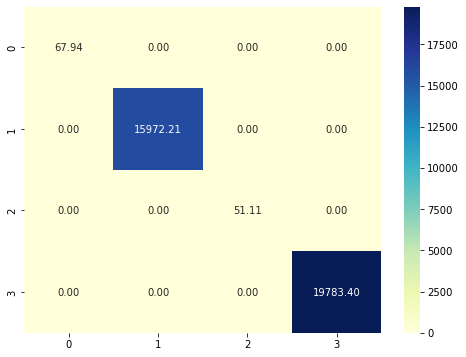

In [29]:
plt.figure(figsize = (8,6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [30]:
S_22 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
S_22.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
S_22.index = ["DMU " + str(i + 1) for i in range(len(S_22))]
S_22 = S_22.round(2)
S_22 

,Input 1,Input 2,Output 1,Output 2
DMU 1,115.29,412.41,117.93,810.51
DMU 2,115.93,369.50,104.26,340.73
DMU 3,111.43,418.37,110.93,300.85
DMU 4,123.87,355.78,119.90,234.46
DMU 5,106.30,525.76,100.49,256.06
...,...,...,...,...
DMU 996,109.41,554.31,107.67,445.62
DMU 997,109.09,383.50,119.18,538.35
DMU 998,132.09,268.22,106.52,656.72
DMU 999,119.90,293.82,114.39,435.82


In [31]:
(S_22<=0).sum()

Input 1     0
Input 2     0
Output 1    0
Output 2    0
dtype: int64

In [32]:
S_22.to_excel("Data/S22.xlsx")

### Unstructured Variance, n_input = 5, n_output = 5 

In [33]:
m = n_input = 5
s = n_output = 5

In [34]:
np.random.seed(0)
x_min = np.random.uniform(1,10, m+s, )
x_min

array([5.94, 7.44, 6.42, 5.9 , 4.81, 6.81, 4.94, 9.03, 9.67, 4.45])

In [35]:
np.random.seed(0)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([549.26, 715.47, 603.16, 545.34, 424.23, 646.25, 438.15, 891.88, 963.7 , 384.06])

In [36]:
x_max = x_min + delta_x
x_max

array([555.2 , 722.91, 609.59, 551.24, 429.04, 653.06, 443.09, 900.91, 973.37, 388.51])

In [37]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([280.57, 365.17, 308.01, 278.57, 216.93, 329.94, 224.01, 454.97, 491.52, 196.48])

In [38]:
std_max = (x_max - x_min) * 0.5 * (1/3.3)
std_max

array([ 83.22, 108.41,  91.39,  82.63,  64.28,  97.92,  66.39, 135.13, 146.02,  58.19])

In [39]:
np.random.seed(0)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [40]:
std_list

[45.67331505073061,
 77.53023080436108,
 55.08532230633703,
 45.02207100192635,
 27.231448547458125,
 63.24362427302044,
 29.049798803706413,
 120.50842406662626,
 140.70923224560437,
 22.31269886058873]

In [41]:
cov_matrix_int = []

for i in range(m + s):
    for j in range(m + s):
        
        if j>i:
            min_ = - std_list[i] *  std_list[j]
            max_ = std_list[i] *  std_list[j]
            
            cov_matrix_int.append((i, j, min_, max_)) 

In [42]:
cov_matrix_int[:10]

[(0, 1, -3541.0626574834428, 3541.0626574834428),
 (0, 2, -2515.9292803683693, 2515.9292803683693),
 (0, 3, -2056.307233107345, 2056.307233107345),
 (0, 4, -1243.7505287958154, 1243.7505287958154),
 (0, 5, -2888.545976371696, 2888.545976371696),
 (0, 6, -1326.80061292202, 1326.80061292202),
 (0, 7, -5504.019218662068, 5504.019218662068),
 (0, 8, -6426.657094899911, 6426.657094899911),
 (0, 9, -1019.0949246917469, 1019.0949246917469),
 (1, 2, -4270.7777523429295, 4270.7777523429295)]

In [43]:
cov_list = []
np.random.seed(0)

for i in cov_matrix_int:
    n = np.random.uniform(i[2],i[3])
    cov_list.append(n)
cov_list[:5]

[345.7033518759422,
 1082.8024553605733,
 422.62614702930296,
 111.64696517285961,
 -441.053244369793]

In [44]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

10


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [45]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = cov_list[k]
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l]) 
            l += 1 
print(cov_matrix)

[[ 2086.05   345.7   1082.8    422.63   111.65  -441.05   387.14  -687.04  5035.58   945.03]
 [  345.7   6010.94  -995.59  2036.57   122.01   667.28  1917.09 -8015.66 -9008.19 -1659.96]
 [ 1082.8   -995.59  3034.39  1649.83   834.5   2578.09  1531.79  3971.78  -597.15   689.6 ]
 [  422.63  2036.57  1649.83  2026.99  -936.     796.81  -932.9   4825.14   276.82  -171.46]
 [  111.65   122.01   834.5   -936.     741.55  -810.97   433.88  -287.8    524.44  -584.77]
 [ -441.05   667.28  2578.09   796.81  -810.97  3999.76   432.24  1708.65  2081.18  1252.38]
 [  387.14  1917.09  1531.79  -932.9    433.88   432.24   843.89  1273.01 -1148.54   -81.63]
 [ -687.04 -8015.66  3971.78  4825.14  -287.8   1708.65  1273.01 14522.28  6702.33 -2364.99]
 [ 5035.58 -9008.19  -597.15   276.82   524.44  2081.18 -1148.54  6702.33 19799.09  1047.16]
 [  945.03 -1659.96   689.6   -171.46  -584.77  1252.38   -81.63 -2364.99  1047.16   497.86]]


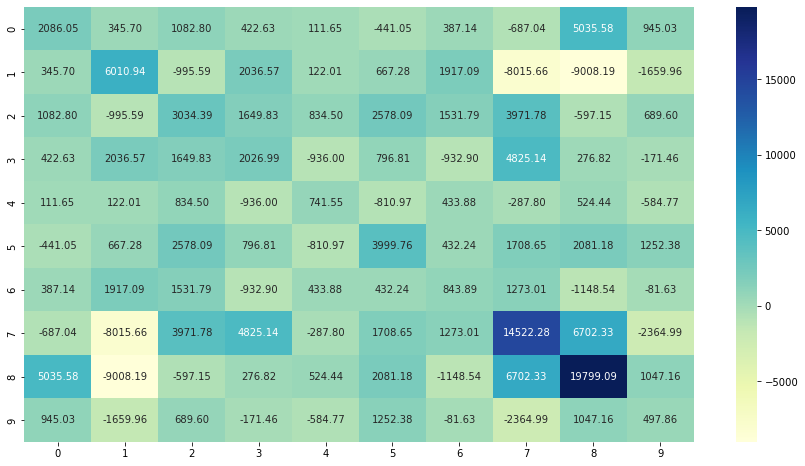

In [46]:
plt.figure(figsize = (15,8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [47]:
US_55 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
US_55.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
US_55.index = ["DMU " + str(i + 1) for i in range(len(US_55))]
US_55 = US_55.round(2)
US_55 

/var/folders/6l/c4m0953s1_jgnd_y35l2l7kc0000gp/T/ipykernel_34887/4285728368.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  US_55 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))


,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,262.93,368.02,311.81,369.14,158.95,373.54,165.68,625.17,620.95,193.29
DMU 2,267.81,449.71,300.84,194.85,195.14,312.06,154.78,360.41,510.36,291.05
DMU 3,315.52,467.64,249.35,285.36,251.24,224.69,214.17,333.71,378.87,180.60
DMU 4,273.62,219.07,245.76,379.23,164.55,345.12,200.72,466.64,560.33,172.56
DMU 5,323.65,298.21,369.23,380.81,117.59,406.04,218.08,513.41,583.01,152.26
...,...,...,...,...,...,...,...,...,...,...
DMU 996,278.92,497.34,292.40,263.17,253.21,349.98,194.55,220.20,296.03,221.31
DMU 997,302.55,554.88,339.71,409.44,163.39,378.89,279.95,437.76,463.17,138.70
DMU 998,288.62,519.41,302.51,257.01,243.24,275.98,274.91,275.49,340.32,211.50
DMU 999,347.93,329.13,187.08,195.77,257.11,293.60,188.74,248.37,516.16,298.74


In [48]:
(US_55<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Output 1    0
Output 2    0
Output 3    0
Output 4    0
Output 5    0
dtype: int64

In [49]:
US_55.to_excel("Data/US55.xlsx")

### Structured Variance, n_input = 5, n_output = 5

In [50]:
m = n_input = 5
s = n_output = 5

In [51]:
np.random.seed(16)
x_min = np.random.uniform(1,10, m+s, )
x_min

array([3.01, 5.71, 5.96, 1.41, 4.25, 3.01, 7.2 , 2.47, 1.63, 9.47])

In [52]:
np.random.seed(16)
delta_x = np.random.uniform(1,1000, m+s)
delta_x

array([224.07, 523.64, 551.15,  46.56, 361.37, 223.86, 689.04, 164.57,  71.25, 941.07])

In [53]:
x_max = x_min + delta_x
x_max

array([227.08, 529.35, 557.11,  47.97, 365.61, 226.87, 696.24, 167.04,  72.89, 950.54])

In [54]:
mean_q = (x_min + x_max)  * 0.5
mean_q

array([115.04, 267.53, 281.53,  24.69, 184.93, 114.94, 351.72,  84.76,  37.26, 480.  ])

In [55]:
std_max = (x_max - x_min) * 0.5 * (1/3)
std_max

array([ 37.34,  87.27,  91.86,   7.76,  60.23,  37.31, 114.84,  27.43,  11.88, 156.84])

In [56]:
np.random.seed(13)
std_list = []

for i in std_max:
    std_list.append(np.random.uniform(0,i))

In [57]:
std_list

[29.04300981956555,
 20.7310211259165,
 75.71695595155174,
 7.493625986871269,
 58.57783715394776,
 16.918029747559075,
 69.94217612479981,
 21.271101635912473,
 7.619644163760224,
 113.24493108419398]

In [58]:
cov_matrix = np.zeros((m + s, m + s))
print(len(cov_matrix))
cov_matrix

10


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
k=0
l=0
for i in range(len(cov_matrix)):
    for j in range(len(cov_matrix)):
        if j>i:
            cov_matrix[i][j] = cov_matrix[j][i] = 0
            k += 1
        if i == j:
            cov_matrix[i][j] = np.square(std_list[l])
            l += 1 
np.set_printoptions(suppress=True)
print(cov_matrix)

[[  843.5      0.       0.       0.       0.       0.       0.       0.       0.       0.  ]
 [    0.     429.78     0.       0.       0.       0.       0.       0.       0.       0.  ]
 [    0.       0.    5733.06     0.       0.       0.       0.       0.       0.       0.  ]
 [    0.       0.       0.      56.15     0.       0.       0.       0.       0.       0.  ]
 [    0.       0.       0.       0.    3431.36     0.       0.       0.       0.       0.  ]
 [    0.       0.       0.       0.       0.     286.22     0.       0.       0.       0.  ]
 [    0.       0.       0.       0.       0.       0.    4891.91     0.       0.       0.  ]
 [    0.       0.       0.       0.       0.       0.       0.     452.46     0.       0.  ]
 [    0.       0.       0.       0.       0.       0.       0.       0.      58.06     0.  ]
 [    0.       0.       0.       0.       0.       0.       0.       0.       0.   12824.41]]


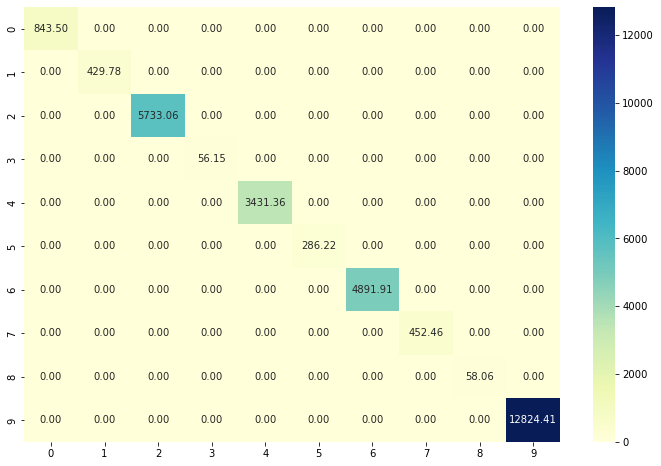

In [60]:
plt.figure(figsize = (12,8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='YlGnBu');

In [61]:
S_55 = pd.DataFrame(np.random.multivariate_normal(mean_q, cov_matrix, 1000))
S_55.columns = ["Input " + str(i + 1) for i in range(m)] + ["Output " + str(i + 1) for i in range(s)]
S_55.index = ["DMU " + str(i + 1) for i in range(len(S_55))]
S_55 = S_55.round(2)
S_55 

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,131.39,286.47,202.38,40.80,111.03,120.31,296.53,79.58,38.23,647.46
DMU 2,142.72,264.52,279.50,22.60,254.68,118.96,282.88,61.63,24.77,548.66
DMU 3,97.01,272.04,159.24,13.35,295.80,123.64,386.05,75.11,40.29,638.46
DMU 4,105.69,305.87,289.20,24.67,251.61,113.56,329.53,76.88,29.79,393.48
DMU 5,103.88,295.52,335.36,28.92,165.44,149.03,383.41,73.48,36.82,453.68
...,...,...,...,...,...,...,...,...,...,...
DMU 996,74.76,259.04,256.76,16.60,177.70,127.51,312.34,102.15,33.67,548.07
DMU 997,93.05,259.66,418.80,21.82,221.48,142.99,351.21,79.78,32.49,432.15
DMU 998,140.95,244.11,294.52,24.72,220.91,143.84,455.42,98.14,42.78,555.36
DMU 999,75.47,290.34,313.33,19.03,80.29,138.95,373.96,91.69,42.01,517.36


In [62]:
(S_55<=0).sum()

Input 1     0
Input 2     0
Input 3     0
Input 4     0
Input 5     0
Output 1    0
Output 2    0
Output 3    0
Output 4    0
Output 5    0
dtype: int64

In [63]:
S_55.to_excel("Data/S55.xlsx")